<a href="https://colab.research.google.com/github/Ronaldo-khagokpam/chess/blob/main/chess2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab.patches import cv2_imshow  # Colab only


In [29]:
!pip install python-chess

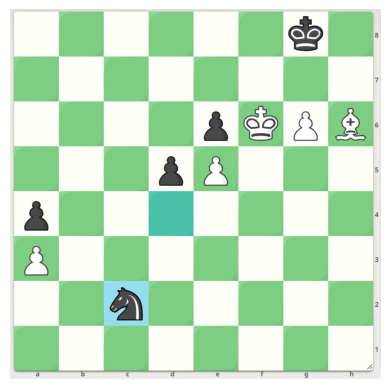

In [35]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('chessboard.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Essential conversion
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes for clean view
plt.show()


In [36]:
import cv2
import numpy as np
import chess  # pip install python-chess

def preprocess_board(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    kernel = np.ones((5,5), np.uint8)
    dilated = cv2.dilate(edges, kernel, iterations=1)

    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), closed=True)
        if len(approx) == 4 and cv2.contourArea(cnt) > 0.05 * img.shape[0] * img.shape[1]:
            pts = approx.reshape(4, 2).astype(np.float32)
            # Order corners: top-left, top-right, bottom-right, bottom-left (a8 to h1)
            rect = np.zeros((4, 2), dtype=np.float32)
            s = pts.sum(axis=1)
            rect[0] = pts[np.argmin(s)]  # top-left
            rect[2] = pts[np.argmax(s)]  # bottom-right
            diff = np.diff(pts, axis=1)
            rect[1] = pts[np.argmin(diff)]  # top-right
            rect[3] = pts[np.argmax(diff)]  # bottom-left

            target_pts = np.array([[0,0], [400,0], [400,400], [0,400]], dtype=np.float32)
            matrix = cv2.getPerspectiveTransform(rect, target_pts)
            warped = cv2.warpPerspective(img, matrix, (400, 400))
            return warped
    return None#[page:2]


In [37]:
warped = preprocess_board(image_path)
if warped is None:
    print("No chessboard detected. Try adjusting camera angle or lighting.")
    exit(1)  # Or retry with different preprocessing params
# Proceed to extract_squares_and_fen(warped)


No chessboard detected. Try adjusting camera angle or lighting.


In [38]:
#Square Extraction and FEN Generation
def extract_squares_and_fen(warped):
    squares = []
    h, w = 400 // 8, 400 // 8  # 50x50 squares
    piece_classes = 'PNBRQKpnbrqk.'  # 13 classes

    board_str = ''
    for rank in range(8):
        empty = 0
        for file in range(8):
            square_img = warped[rank*h:(rank+1)*h, file*w:(file+1)*w]
            square_img = cv2.resize(square_img, (224, 224))  # For CNN input
            squares.append(square_img)

            # Mock CNN prediction (replace with model.predict(square_img)[0])
            pred_class = classify_piece(square_img)  # Returns index 0-12
            piece = piece_classes[pred_class]

            if piece == '.':
                empty += 1
            else:
                if empty > 0:
                    board_str += str(empty)
                    empty = 0
                board_str += piece
        if empty > 0:
            board_str += str(empty)
        board_str += '/'

    fen = board_str.rstrip('/') + ' w KQkq - 0 1'  # Simplified FEN
    board = chess.Board(fen)
    return fen, board.is_valid(), squares[web:28][page:2]

def classify_piece(square_img):
    # Placeholder: Train a ResNet-like CNN on ChessReD dataset
    # Input: 3x224x224, Output: 13 classes
    return 12  # Dummy empty class[page:2]


In [33]:
# Full Usage Example
image_path = 'chessboard.jpg'
warped = preprocess_board(image_path)
if warped is not None:
    fen, valid, _ = extract_squares_and_fen(warped)
    print(f"FEN: {fen}")
    if valid:
        print("Valid chess position")
    else:
        print("Invalid FEN generated")


In [34]:
warped = preprocess_board(image_path)
if warped is None:
    print("No chessboard detected. Try adjusting camera angle or lighting.")
    exit(1)  # Or retry with different preprocessing params
# Proceed to extract_squares_and_fen(warped)


No chessboard detected. Try adjusting camera angle or lighting.


In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from torchvision.models import resnet18
import chess  # For FEN parsing

# ChessReD: assumes structure chessred/train/{class}/, chessred/val/{class}/
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_ds = datasets.ImageFolder('chessred/train', transform_train)
val_ds = datasets.ImageFolder('chessred/val', transform_test)
train_loader = DataLoader(train_ds, 32, shuffle=True)
val_loader = DataLoader(val_ds, 32)


FileNotFoundError: [Errno 2] No such file or directory: 'chessred/train'